<a href="https://colab.research.google.com/github/asrafulasf72/Data-Mining-Algorithm/blob/main/tree%26adaboost_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

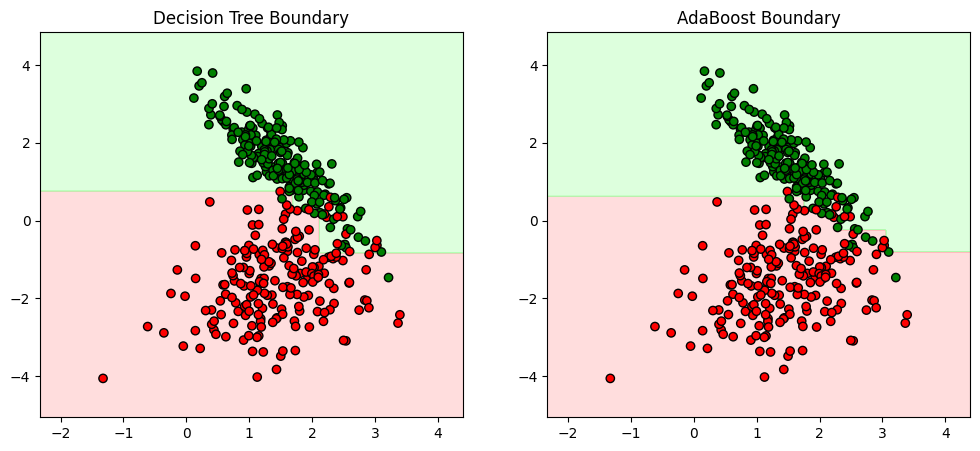

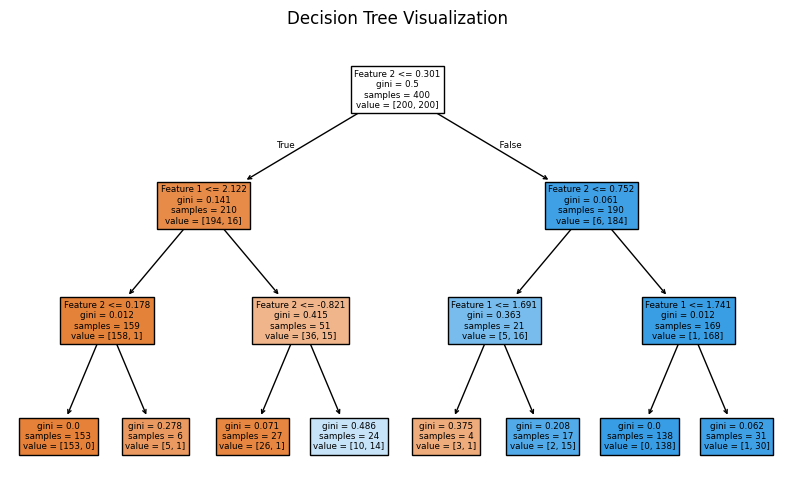

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
from matplotlib.colors import ListedColormap
import numpy as np

# Generate synthetic data
X, y = make_classification(
    n_samples=400, n_features=2,
    n_redundant=0, n_clusters_per_class=1,
    class_sep=1.5, random_state=42
)

# Models
dt = DecisionTreeClassifier(max_depth=3)
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0
)

dt.fit(X, y)
ada.fit(X, y)

# Decision boundary plotting function
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_bg = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_pts = ListedColormap(['red', 'green'])

    ax.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_bg)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_pts, edgecolor='k')
    ax.set_title(title)

# Plot both decision boundaries
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(dt, X, y, ax[0], "Decision Tree Boundary")
plot_decision_boundary(ada, X, y, ax[1], "AdaBoost Boundary")
plt.show()

# Plot Decision Tree Structure
plt.figure(figsize=(10, 6))
plot_tree(dt, filled=True, feature_names=["Feature 1", "Feature 2"])
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:
#compare the classification output with visualization between decision tree and adaboost algorithm.